In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
BAN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CP.csv')
BAN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_ADNI.csv')
BAN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CogConVar.csv')
BAN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_NCN.csv')

DBN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CP_BET.csv')
DBN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_ADNI_BET.csv')
DBN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CogConVar_BET.csv')
DBN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_NCN_BET.csv')

pyment_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CP.csv')
pyment_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_ADNI.csv')
pyment_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CogConVar.csv')
pyment_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_NCN.csv')

ENIGMA_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_CP.csv')
ENIGMA_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_NCN= pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_NCN.csv')
ENIGMA_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_CogConVar.csv')


BrainAgeNeXt:

In [55]:
#CP-----------------------------------------------------------------------
BAN_CP['mean']=BAN_CP['Edad']+BAN_CP['Predicted_Brain_Age']
BAN_CP['mean']=BAN_CP['mean']/2


mean_diff_BANCP=np.mean(BAN_CP['Error'])
std_diff_BANCP=np.std(BAN_CP['Error'])

#intervalo de confianza del 95%
upper_limit_BANCP = mean_diff_BANCP + 1.96 * std_diff_BANCP
lower_limit_BANCP = mean_diff_BANCP - 1.96 * std_diff_BANCP

#ADNI CN-----------------------------------------------------------------------
BAN_ADNI['mean']=BAN_ADNI['Age']+BAN_ADNI['Predicted_Brain_Age']
BAN_ADNI['mean']=BAN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])
std_diff_control_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_BANADNI = mean_diff_control_BANADNI + 1.96 * std_diff_control_BANADNI
lower_limit_control_BANADNI = mean_diff_control_BANADNI - 1.96 * std_diff_control_BANADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_BANADNI = mean_diff_clinical_BANADNI + 1.96 * std_diff_clinical_BANADNI
lower_limit_clinical_BANADNI = mean_diff_clinical_BANADNI - 1.96 * std_diff_clinical_BANADNI

#NCN-----------------------------------------------------------------------
BAN_NCN['mean']=BAN_NCN['age']+BAN_NCN['Predicted_Brain_Age']
BAN_NCN['mean']=BAN_NCN['mean']/2


mean_diff_BANNCN=np.mean(BAN_NCN['Error'])
std_diff_BANNCN=np.std(BAN_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_BANNCN = mean_diff_BANNCN + 1.96 * std_diff_BANNCN
lower_limit_BANNCN = mean_diff_BANNCN - 1.96 * std_diff_BANNCN

#CogConVar-----------------------------------------------------------------------
BAN_CogConVar['mean']=BAN_CogConVar['age']+BAN_CogConVar['Predicted_Brain_Age']
BAN_CogConVar['mean']=BAN_CogConVar['mean']/2

mean_diff_BANCogConVar=np.mean(BAN_CogConVar['Error'])
std_diff_BANCogConVar=np.std(BAN_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_BANCogConVar = mean_diff_BANCogConVar + 1.96 * std_diff_BANCogConVar
lower_limit_BANCogConVar = mean_diff_BANCogConVar - 1.96 * std_diff_BANCogConVar

In [56]:
# Eliminar nulos
BAN_CP = BAN_CP.dropna(subset=['Error', 'mean'])
BAN_ADNI = BAN_ADNI.dropna(subset=['Error', 'mean'])
BAN_NCN = BAN_NCN.dropna(subset=['Error', 'mean'])
BAN_CogConVar = BAN_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión BAN_CP
slope_BANCP, intercept_BANCP = np.polyfit(BAN_CP['mean'], BAN_CP['Error'], 1)
tendencia_BANCP = slope_BANCP * BAN_CP['mean'] + intercept_BANCP

# Regressión BAN_ADNICN
slope_BANADNICN, intercept_BANADNICN = np.polyfit(BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'], 1)
tendencia_BANADNICN = slope_BANADNICN * BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'] + intercept_BANADNICN

# Regressión BAN_ADNIcli
slope_BANADNIcli, intercept_BANADNIcli = np.polyfit(BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'], 1)
tendencia_BANADNIcli = slope_BANADNIcli * BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'] + intercept_BANADNIcli

# Regressión BAN_NCN
slope_BANNCN, intercept_BANNCN = np.polyfit(BAN_NCN['mean'], BAN_NCN['Error'], 1)
tendencia_BANNCN = slope_BANNCN * BAN_NCN['mean'] + intercept_BANNCN

# Regressión BAN_CogConVar
slope_BANCogConVar, intercept_BANCogConVar = np.polyfit(BAN_CogConVar['mean'], BAN_CogConVar['Error'], 1)
tendencia_BANCogConVar = slope_BANCogConVar * BAN_CogConVar['mean'] + intercept_BANCogConVar


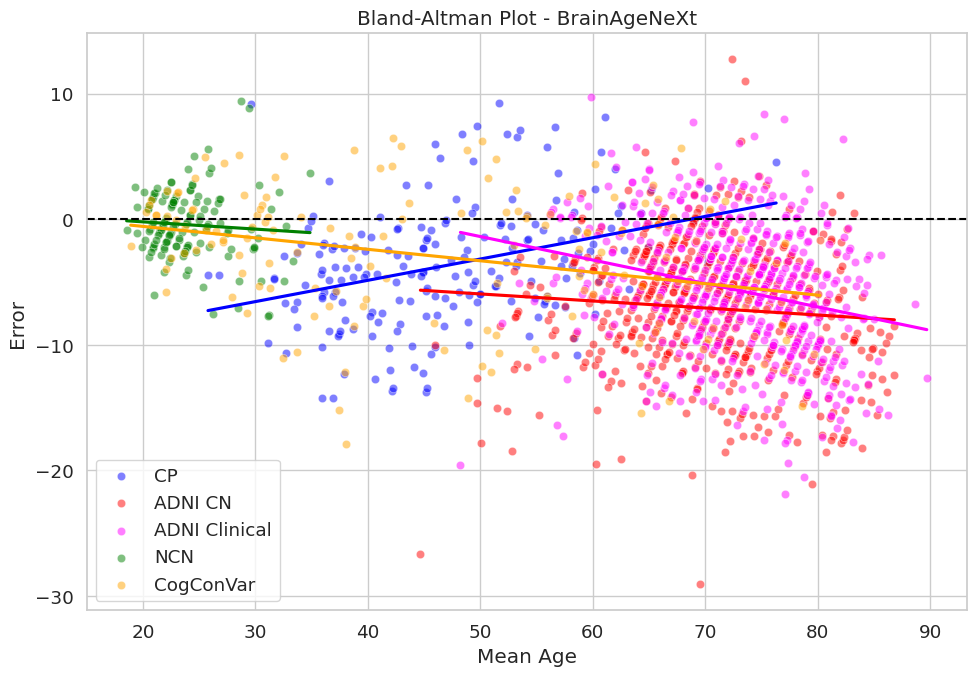

In [57]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# CP
sns.scatterplot(data=BAN_CP, x='mean', y='Error', color='blue', label='CP', alpha=0.5)
sns.regplot(data=BAN_CP, x='mean', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)

# NCN
sns.scatterplot(data=BAN_NCN, x='mean', y='Error', color='green', label='NCN', alpha=0.5)
sns.regplot(data=BAN_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)

# CogConVar
sns.scatterplot(data=BAN_CogConVar, x='mean', y='Error', color='orange', label='CogConVar', alpha=0.5)
sns.regplot(data=BAN_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - BrainAgeNeXt')
plt.xlabel('Mean Age')
plt.ylabel('Error ')
plt.grid(True)
plt.tight_layout()
plt.show()



DeepBrainNet

In [58]:
#CP-----------------------------------------------------------------------
DBN_CP['mean']=DBN_CP['Edad']+DBN_CP['Pred_Age']
DBN_CP['mean']=DBN_CP['mean']/2

mean_diff_DBNCP=np.mean(DBN_CP['Error'])
std_diff_DBNCP=np.std(DBN_CP['Error'])

#intervalo de confianza del 95%
upper_limit_DBNCP = mean_diff_DBNCP + 1.96 * std_diff_DBNCP
lower_limit_DBNCP = mean_diff_DBNCP - 1.96 * std_diff_DBNCP

#ADNI CN-----------------------------------------------------------------------
DBN_ADNI['mean']=DBN_ADNI['Age']+DBN_ADNI['Pred_Age']
DBN_ADNI['mean']=DBN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])
std_diff_control_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_DBNADNI = mean_diff_control_DBNADNI + 1.96 * std_diff_control_DBNADNI
lower_limit_control_DBNADNI = mean_diff_control_DBNADNI - 1.96 * std_diff_control_DBNADNI

#ADNI clinical-----------------------------------------------------------------------

#media y desviación estándar de las diferencias
mean_diff_clinical_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI + 1.96 * std_diff_clinical_DBNADNI
lower_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI - 1.96 * std_diff_clinical_DBNADNI

#NCN----------------------------------------------------------------
DBN_NCN['mean']=DBN_NCN['age']+DBN_NCN['Pred_Age']
DBN_NCN['mean']=DBN_NCN['mean']/2

mean_diff_DBNNCN=np.mean(DBN_NCN['Error'])
std_diff_DBNNCN=np.std(DBN_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_DBNNCN = mean_diff_DBNNCN + 1.96 * std_diff_DBNNCN
lower_limit_DBNNCN = mean_diff_DBNNCN - 1.96 * std_diff_DBNNCN

#CogConVar-----------------------------------------------------------------------
DBN_CogConVar['mean']=DBN_CogConVar['age']+DBN_CogConVar['Pred_Age']
DBN_CogConVar['mean']=DBN_CogConVar['mean']/2

mean_diff_DBNCogConVar=np.mean(DBN_CogConVar['Error'])
std_diff_DBNCogConVar=np.std(DBN_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_DBNCogConVar = mean_diff_DBNCogConVar + 1.96 * std_diff_DBNCogConVar
lower_limit_DBNCogConVar = mean_diff_DBNCogConVar - 1.96 * std_diff_DBNCogConVar

In [59]:
# Eliminar nulos
DBN_CP = DBN_CP.dropna(subset=['Error', 'mean'])
DBN_ADNI = DBN_ADNI.dropna(subset=['Error', 'mean'])
DBN_NCN = DBN_NCN.dropna(subset=['Error', 'mean'])
DBN_CogConVar = DBN_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión DBN_CP
slope_DBNCP, intercept_DBNCP = np.polyfit(DBN_CP['mean'], DBN_CP['Error'], 1)
tendencia_DBNCP = slope_DBNCP * DBN_CP['mean'] + intercept_DBNCP

# Regressión DBN_ADNICN
slope_DBNADNICN, intercept_DBNADNICN = np.polyfit(DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'], 1)
tendencia_DBNADNICN = slope_DBNADNICN * DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'] + intercept_DBNADNICN

# Regressión DBN_ADNIcli
slope_DBNADNIcli, intercept_DBNADNIcli = np.polyfit(DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'], 1)
tendencia_DBNADNIcli = slope_DBNADNIcli * DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'] + intercept_DBNADNIcli

# Regressión DBN_NCN
slope_DBNNCN, intercept_DBNNCN = np.polyfit(DBN_NCN['mean'], DBN_NCN['Error'], 1)
tendencia_DBNNCN = slope_DBNNCN * DBN_NCN['mean'] + intercept_DBNNCN

# Regressión DBN_CogConVar
slope_DBNCogConVar, intercept_DBNCogConVar = np.polyfit(DBN_CogConVar['mean'], DBN_CogConVar['Error'], 1)
tendencia_DBNCogConVar = slope_DBNCogConVar * DBN_CogConVar['mean'] + intercept_DBNCogConVar

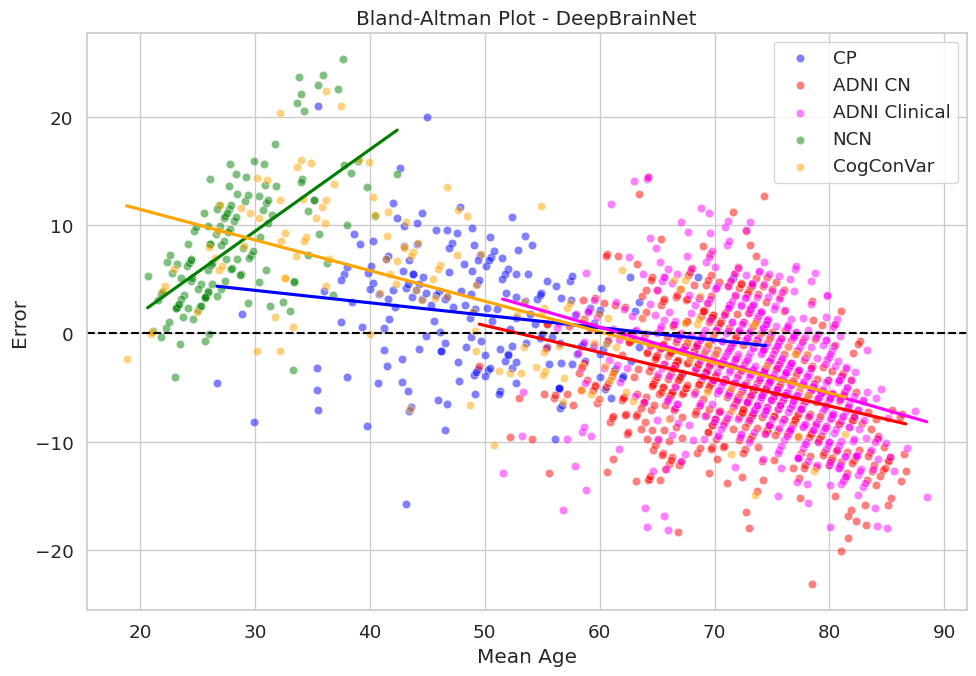

In [60]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# CP
sns.scatterplot(data=DBN_CP, x='mean', y='Error', color='blue', label='CP', alpha=0.5)
sns.regplot(data=DBN_CP, x='mean', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)

# NCN
sns.scatterplot(data=DBN_NCN, x='mean', y='Error', color='green', label='NCN', alpha=0.5)
sns.regplot(data=DBN_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)

# CogConVar
sns.scatterplot(data=DBN_CogConVar, x='mean', y='Error', color='orange', label='CogConVar', alpha=0.5)
sns.regplot(data=DBN_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - DeepBrainNet')
plt.xlabel('Mean Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()


pyment

In [61]:
#CP-----------------------------------------------------------------------
pyment_CP['mean']=pyment_CP['Edad']+pyment_CP['prediction']
pyment_CP['mean']=pyment_CP['mean']/2

mean_diff_pymentCP=np.mean(pyment_CP['Error'])
std_diff_pymentCP=np.std(pyment_CP['Error'])

#intervalo de confianza del 95%
upper_limit_pymentCP = mean_diff_pymentCP + 1.96 * std_diff_pymentCP
lower_limit_pymentCP = mean_diff_pymentCP - 1.96 * std_diff_pymentCP

#ADNI CN-----------------------------------------------------------------------
pyment_ADNI['mean']=pyment_ADNI['Age']+pyment_ADNI['prediction']
pyment_ADNI['mean']=pyment_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])
std_diff_control_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_pymentADNI = mean_diff_control_pymentADNI + 1.96 * std_diff_control_pymentADNI
lower_limit_control_pymentADNI = mean_diff_control_pymentADNI - 1.96 * std_diff_control_pymentADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])
std_diff_clinical_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI + 1.96 * std_diff_clinical_pymentADNI
lower_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI - 1.96 * std_diff_clinical_pymentADNI

#NCN-----------------------------------------------------------------------
pyment_NCN['mean']=pyment_NCN['age']+pyment_NCN['prediction']
pyment_NCN['mean']=pyment_NCN['mean']/2

mean_diff_pymentNCN=np.mean(pyment_NCN['Error'])
std_diff_pymentNCN=np.std(pyment_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_pymentNCN = mean_diff_pymentNCN + 1.96 * std_diff_pymentNCN
lower_limit_pymentNCN = mean_diff_pymentNCN - 1.96 * std_diff_pymentNCN

#CogConVar-----------------------------------------------------------------------
pyment_CogConVar['mean']=pyment_CogConVar['age']+pyment_CogConVar['prediction']
pyment_CogConVar['mean']=pyment_CogConVar['mean']/2

mean_diff_pymentCogConVar=np.mean(pyment_CogConVar['Error'])
std_diff_pymentCogConVar=np.std(pyment_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_pymentCogConVar = mean_diff_pymentCogConVar + 1.96 * std_diff_pymentCogConVar
lower_limit_pymentCogConVar = mean_diff_pymentCogConVar - 1.96 * std_diff_pymentCogConVar

In [62]:
#eliminar nulos
pyment_CP = pyment_CP.dropna(subset=['Error', 'mean'])
pyment_ADNI = pyment_ADNI.dropna(subset=['Error', 'mean'])
pyment_NCN = pyment_NCN.dropna(subset=['Error', 'mean'])
pyment_CogConVar = pyment_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión pyment_CP
slope_pymentCP, intercept_pymentCP = np.polyfit(pyment_CP['mean'], pyment_CP['Error'], 1)
tendencia_pymentCP = slope_pymentCP * pyment_CP['mean'] + intercept_pymentCP

# Regressión pyment_ADNICN
slope_pymentADNICN, intercept_pymentADNICN = np.polyfit(pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'], 1)
tendencia_pymentADNICN = slope_pymentADNICN * pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'] + intercept_pymentADNICN

# Regressión pyment_ADNIcli
slope_pymentADNIcli, intercept_pymentADNIcli = np.polyfit(pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'], 1)
tendencia_pymentADNIcli = slope_pymentADNIcli * pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'] + intercept_pymentADNIcli

# Regressión pyment_NCN
slope_pymentNCN, intercept_pymentNCN = np.polyfit(pyment_NCN['mean'], pyment_NCN['Error'], 1)
tendencia_pymentNCN = slope_pymentNCN * pyment_NCN['mean'] + intercept_pymentNCN

# Regressión pyment_CogConVar
slope_pymentCogConVar, intercept_pymentCogConVar = np.polyfit(pyment_CogConVar['mean'], pyment_CogConVar['Error'], 1)
tendencia_pymentCogConVar = slope_pymentCogConVar * pyment_CogConVar['mean'] + intercept_pymentCogConVar

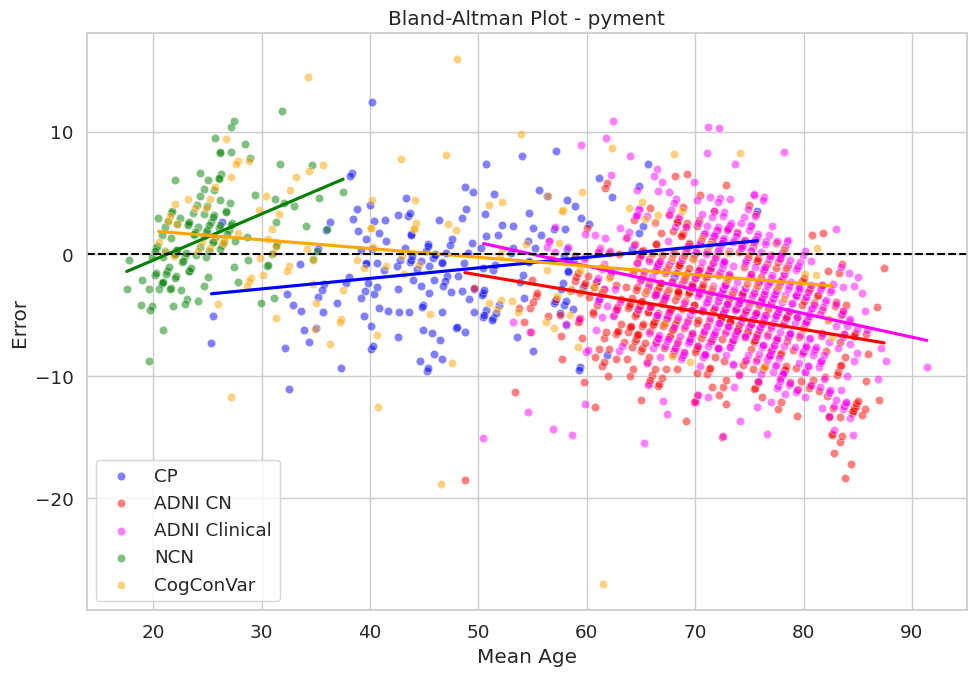

In [63]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# CP
sns.scatterplot(data=pyment_CP, x='mean', y='Error', color='blue', label='CP', alpha=0.5)
sns.regplot(data=pyment_CP, x='mean', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)

# NCN
sns.scatterplot(data=pyment_NCN, x='mean', y='Error', color='green', label='NCN', alpha=0.5)
sns.regplot(data=pyment_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)

# CogConVar
sns.scatterplot(data=pyment_CogConVar, x='mean', y='Error', color='orange', label='CogConVar', alpha=0.5)
sns.regplot(data=pyment_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - pyment')
plt.xlabel('Mean Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()

ENIGMA

In [64]:
#CP-----------------------------------------------------------------------
ENIGMA_CP['mean']=ENIGMA_CP['Edad']+ENIGMA_CP['prediction']
ENIGMA_CP['mean']=ENIGMA_CP['mean']/2
mean_diff_ENIGMACP=np.mean(ENIGMA_CP['Error'])
std_diff_ENIGMACP=np.std(ENIGMA_CP['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMACP = mean_diff_ENIGMACP + 1.96 * std_diff_ENIGMACP
lower_limit_ENIGMACP = mean_diff_ENIGMACP - 1.96 * std_diff_ENIGMACP

#ADNI CN-----------------------------------------------------------------------
ENIGMA_ADNI['mean']=ENIGMA_ADNI['Age']+ENIGMA_ADNI['prediction']
ENIGMA_ADNI['mean']=ENIGMA_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])
std_diff_control_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI + 1.96 * std_diff_control_ENIGMAADNI
lower_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI - 1.96 * std_diff_control_ENIGMAADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])
std_diff_clinical_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI + 1.96 * std_diff_clinical_ENIGMAADNI
lower_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI - 1.96 * std_diff_clinical_ENIGMAADNI

#NCN-----------------------------------------------------------------------
ENIGMA_NCN['mean']=ENIGMA_NCN['age']+ENIGMA_NCN['prediction']
ENIGMA_NCN['mean']=ENIGMA_NCN['mean']/2

mean_diff_ENIGMANCN=np.mean(ENIGMA_NCN['Error'])
std_diff_ENIGMANCN=np.std(ENIGMA_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMANCN = mean_diff_ENIGMANCN + 1.96 * std_diff_ENIGMANCN
lower_limit_ENIGMANCN = mean_diff_ENIGMANCN - 1.96 * std_diff_ENIGMANCN

#CogConVar-----------------------------------------------------------------------
ENIGMA_CogConVar['mean']=ENIGMA_CogConVar['age']+ENIGMA_CogConVar['prediction']
ENIGMA_CogConVar['mean']=ENIGMA_CogConVar['mean']/2

mean_diff_ENIGMACogConVar=np.mean(ENIGMA_CogConVar['Error'])
std_diff_ENIGMACogConVar=np.std(ENIGMA_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar + 1.96 * std_diff_ENIGMACogConVar
lower_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar - 1.96 * std_diff_ENIGMACogConVar  



In [65]:
#eliminar nulos
ENIGMA_CP = ENIGMA_CP.dropna(subset=['Error', 'mean'])
ENIGMA_ADNI = ENIGMA_ADNI.dropna(subset=['Error', 'mean'])
#ENIGMA_NCN = ENIGMA_NCN.dropna(subset=['Error', 'mean'])
#ENIGMA_CogConVar = ENIGMA_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión ENIGMA_CP
slope_ENIGMACP, intercept_ENIGMACP = np.polyfit(ENIGMA_CP['mean'], ENIGMA_CP['Error'], 1)
tendencia_ENIGMACP = slope_ENIGMACP * ENIGMA_CP['mean'] + intercept_ENIGMACP

# Regressión ENIGMA_ADNICN
slope_ENIGMAADNICN, intercept_ENIGMAADNICN = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'], 1)
tendencia_ENIGMAADNICN = slope_ENIGMAADNICN * ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'] + intercept_ENIGMAADNICN

# Regressión ENIGMA_ADNIcli
slope_ENIGMAADNIcli, intercept_ENIGMAADNIcli = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'], 1)
tendencia_ENIGMAADNIcli = slope_ENIGMAADNIcli * ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'] + intercept_ENIGMAADNIcli

# Regressión ENIGMA_NCN
slope_ENIGMANCN, intercept_ENIGMANCN = np.polyfit(ENIGMA_NCN['mean'], ENIGMA_NCN['Error'], 1)
tendencia_ENIGMANCN = slope_ENIGMANCN * ENIGMA_NCN['mean'] + intercept_ENIGMANCN

# Regressión ENIGMA_CogConVar
slope_ENIGMACogConVar, intercept_ENIGMACogConVar = np.polyfit(ENIGMA_CogConVar['mean'], ENIGMA_CogConVar['Error'], 1)
tendencia_ENIGMACogConVar = slope_ENIGMACogConVar * ENIGMA_CogConVar['mean'] + intercept_ENIGMACogConVar


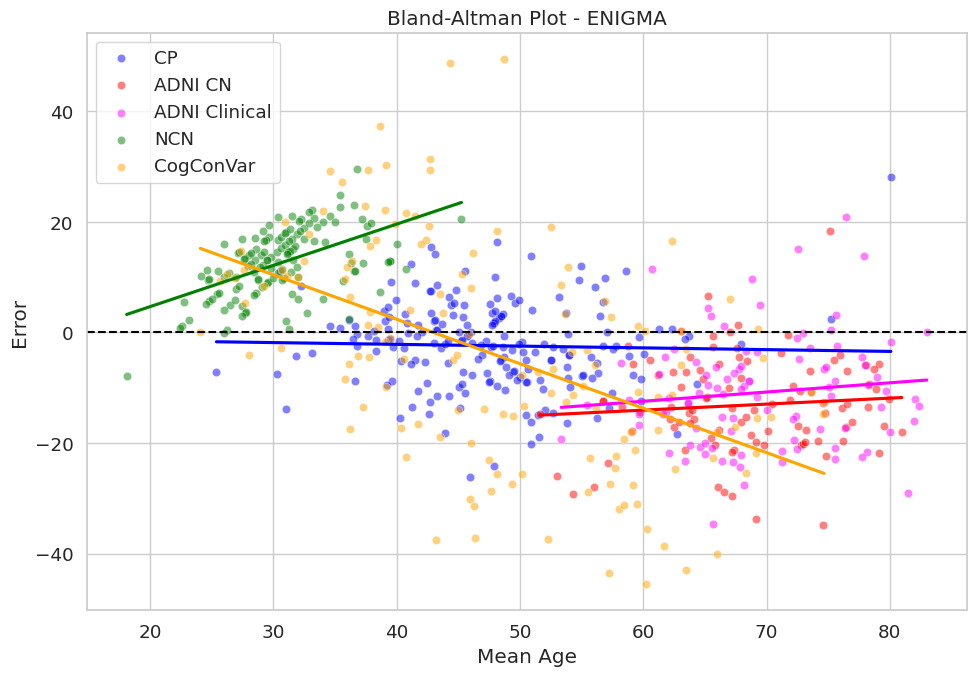

In [66]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.2)

# --- Scatter + línea de tendencia para cada cohorte ---
# CP
sns.scatterplot(data=ENIGMA_CP, x='mean', y='Error', color='blue', label='CP', alpha=0.5)
sns.regplot(data=ENIGMA_CP, x='mean', y='Error', scatter=False, color='blue', ci=None)

# ADNI CN
sns.scatterplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', label='ADNI CN', alpha=0.5)
sns.regplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)

# ADNI Clinical
sns.scatterplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
sns.regplot(data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)

# NCN
sns.scatterplot(data=ENIGMA_NCN, x='mean', y='Error', color='green', label='NCN', alpha=0.5)
sns.regplot(data=ENIGMA_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)

# CogConVar
sns.scatterplot(data=ENIGMA_CogConVar, x='mean', y='Error', color='orange', label='CogConVar', alpha=0.5)
sns.regplot(data=ENIGMA_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)

# --- Líneas horizontales comunes (si querés una sola media de referencia) ---
plt.axhline(0, color='black', linestyle='--')

plt.title('Bland-Altman Plot - ENIGMA')
plt.xlabel('Mean Age')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
BAN_all = pd.concat([BAN_CP, BAN_ADNI, BAN_NCN, BAN_CogConVar], ignore_index=True)
DBN_all = pd.concat([DBN_CP, DBN_ADNI, DBN_NCN, DBN_CogConVar], ignore_index=True)
pyment_all = pd.concat([pyment_CP, pyment_ADNI, pyment_NCN, pyment_CogConVar], ignore_index=True)
ENIGMA_all = pd.concat([ENIGMA_CP, ENIGMA_ADNI, ENIGMA_NCN, ENIGMA_CogConVar], ignore_index=True)

In [81]:
ENIGMA_all['mean']

0      34.570515
1      48.651028
2      58.591636
3      55.032501
4      39.297173
         ...    
667    59.473065
668    50.304168
669    27.672050
670    48.166408
671    55.554769
Name: mean, Length: 672, dtype: float64

In [82]:
#BAN 
mean_diff_BAN=np.mean(BAN_all['Error'])
std_diff_BAN=np.std(BAN_all['Error'])
#intervalo de confianza del 95%
upper_limit_BAN = mean_diff_BAN + 1.96 * std_diff_BAN
lower_limit_BAN = mean_diff_BAN - 1.96 * std_diff_BAN

#DBN
mean_diff_DBN=np.mean(DBN_all['Error'])
std_diff_DBN=np.std(DBN_all['Error'])
#intervalo de confianza del 95%
upper_limit_DBN = mean_diff_DBN + 1.96 * std_diff_DBN
lower_limit_DBN = mean_diff_DBN - 1.96 * std_diff_DBN

#pyment
mean_diff_pyment=np.mean(pyment_all['Error'])
std_diff_pyment=np.std(pyment_all['Error'])
#intervalo de confianza del 95%
upper_limit_pyment = mean_diff_pyment + 1.96 * std_diff_pyment
lower_limit_pyment = mean_diff_pyment - 1.96 * std_diff_pyment

#ENIGMA
mean_diff_ENIGMA=np.mean(ENIGMA_all['Error'])
std_diff_ENIGMA=np.std(ENIGMA_all['Error'])
#intervalo de confianza del 95%
upper_limit_ENIGMA = mean_diff_ENIGMA + 1.96 * std_diff_ENIGMA
lower_limit_ENIGMA = mean_diff_ENIGMA - 1.96 * std_diff_ENIGMA

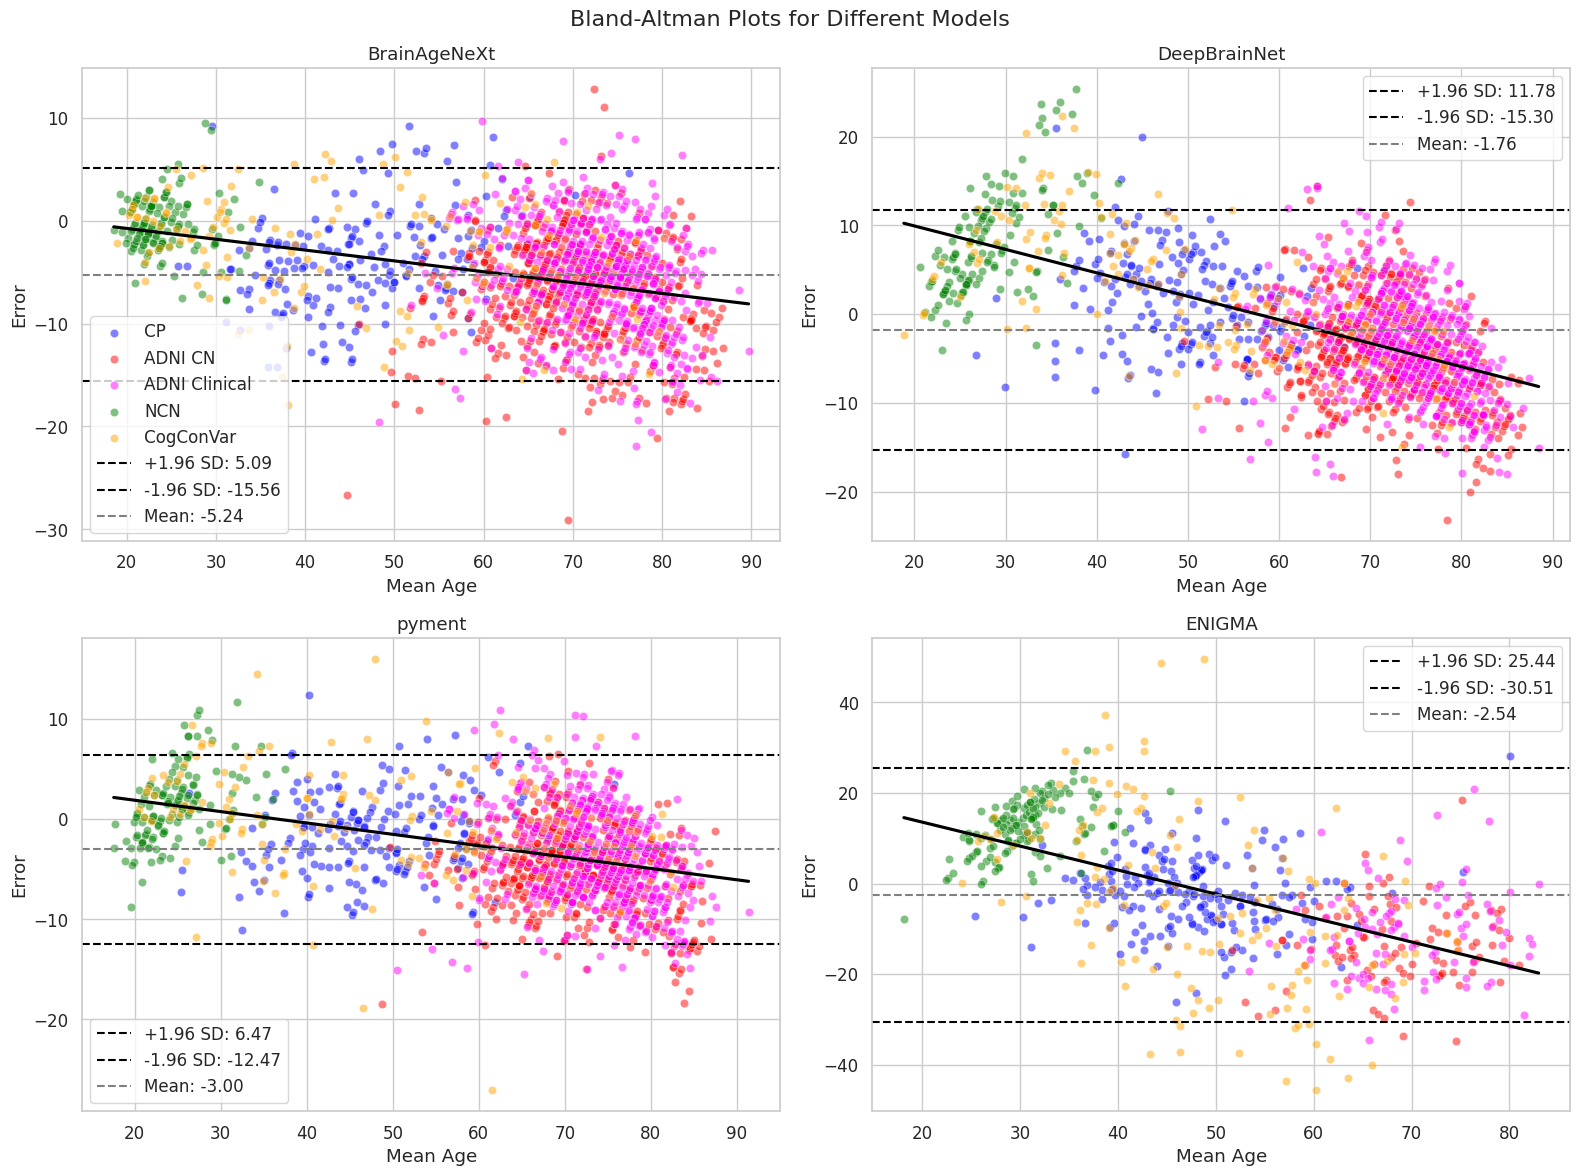

In [94]:
sns.set(style="whitegrid", font_scale=1.1)

# Crear figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# ---- Configurar cada subplot ----

# 1. BrainAgeNeXt
axes[0].set_title('BrainAgeNeXt')
sns.scatterplot(ax=axes[0], data=BAN_CP, x='mean', y='Error', color='blue', label='CP', alpha=0.5)
sns.regplot(ax=axes[0], data=BAN_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[0], data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', label='ADNI CN', alpha=0.5)
#sns.regplot(ax=axes[0], data=BAN_ADNI[BAN_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)
sns.scatterplot(ax=axes[0], data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', label='ADNI Clinical', alpha=0.5)
#sns.regplot(ax=axes[0], data=BAN_ADNI[BAN_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)
sns.scatterplot(ax=axes[0], data=BAN_NCN, x='mean', y='Error', color='green', label='NCN', alpha=0.5)
#sns.regplot(ax=axes[0], data=BAN_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)
sns.scatterplot(ax=axes[0], data=BAN_CogConVar, x='mean', y='Error', color='orange', label='CogConVar', alpha=0.5)
#sns.regplot(ax=axes[0], data=BAN_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)
#grafico de upper y lower limit
axes[0].axhline(upper_limit_BAN, color='black', linestyle='--',label=f'+1.96 SD: {upper_limit_BAN:.2f}')
axes[0].axhline(lower_limit_BAN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_BAN:.2f}')
axes[0].axhline(mean_diff_BAN, color='gray', linestyle='--', label=f'Mean: {mean_diff_BAN:.2f}')
axes[0].legend()

# 2. DeepBrainNet
axes[1].set_title('DeepBrainNet')
sns.scatterplot(ax=axes[1], data=DBN_CP, x='mean', y='Error', color='blue', alpha=0.5)
sns.regplot(ax=axes[1], data=DBN_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[1], data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', alpha=0.5)
#sns.regplot(ax=axes[1], data=DBN_ADNI[DBN_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)
sns.scatterplot(ax=axes[1], data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', alpha=0.5)
#sns.regplot(ax=axes[1], data=DBN_ADNI[DBN_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)
sns.scatterplot(ax=axes[1], data=DBN_NCN, x='mean', y='Error', color='green', alpha=0.5)
#sns.regplot(ax=axes[1], data=DBN_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)
sns.scatterplot(ax=axes[1], data=DBN_CogConVar, x='mean', y='Error', color='orange', alpha=0.5)
#sns.regplot(ax=axes[1], data=DBN_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)
axes[1].axhline(upper_limit_DBN, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_DBN:.2f}')
axes[1].axhline(lower_limit_DBN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_DBN:.2f}')
axes[1].axhline(mean_diff_DBN, color='gray', linestyle='--', label=f'Mean: {mean_diff_DBN:.2f}')
axes[1].legend()

# 3. pyment
axes[2].set_title('pyment')
sns.scatterplot(ax=axes[2], data=pyment_CP, x='mean', y='Error', color='blue', alpha=0.5)
sns.regplot(ax=axes[2], data=pyment_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[2], data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', alpha=0.5)
#sns.regplot(ax=axes[2], data=pyment_ADNI[pyment_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)
sns.scatterplot(ax=axes[2], data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', alpha=0.5)
#sns.regplot(ax=axes[2], data=pyment_ADNI[pyment_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)
sns.scatterplot(ax=axes[2], data=pyment_NCN, x='mean', y='Error', color='green', alpha=0.5)
#sns.regplot(ax=axes[2], data=pyment_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)
sns.scatterplot(ax=axes[2], data=pyment_CogConVar, x='mean', y='Error', color='orange', alpha=0.5)
#sns.regplot(ax=axes[2], data=pyment_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)
axes[2].axhline(upper_limit_pyment, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_pyment:.2f}')
axes[2].axhline(lower_limit_pyment, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_pyment:.2f}')
axes[2].axhline(mean_diff_pyment, color='gray', linestyle='--', label=f'Mean: {mean_diff_pyment:.2f}')
axes[2].legend()

# 4. ENIGMA
axes[3].set_title('ENIGMA')
sns.scatterplot(ax=axes[3], data=ENIGMA_CP, x='mean', y='Error', color='blue', alpha=0.5)
sns.regplot(ax=axes[3], data=ENIGMA_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[3], data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='mean', y='Error', color='red', alpha=0.5)
#sns.regplot(ax=axes[3], data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] == 'CN'], x='mean', y='Error', scatter=False, color='red', ci=None)
sns.scatterplot(ax=axes[3], data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='mean', y='Error', color='magenta', alpha=0.5)
#sns.regplot(ax=axes[3], data=ENIGMA_ADNI[ENIGMA_ADNI['Group'] != 'CN'], x='mean', y='Error', scatter=False, color='magenta', ci=None)
sns.scatterplot(ax=axes[3], data=ENIGMA_NCN, x='mean', y='Error', color='green', alpha=0.5)
#sns.regplot(ax=axes[3], data=ENIGMA_NCN, x='mean', y='Error', scatter=False, color='green', ci=None)
sns.scatterplot(ax=axes[3], data=ENIGMA_CogConVar, x='mean', y='Error', color='orange', alpha=0.5)
#sns.regplot(ax=axes[3], data=ENIGMA_CogConVar, x='mean', y='Error', scatter=False, color='orange', ci=None)
axes[3].axhline(upper_limit_ENIGMA, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIGMA:.2f}')
axes[3].axhline(lower_limit_ENIGMA, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMA:.2f}')
axes[3].axhline(mean_diff_ENIGMA, color='gray', linestyle='--', label=f'Mean: {mean_diff_ENIGMA:.2f}')
axes[3].legend()

# Etiquetas comunes
for ax in axes:
    ax.set_xlabel('Mean Age')
    ax.set_ylabel('Error')
    ax.grid(True)

plt.suptitle('Bland-Altman Plots for Different Models', fontsize=16)
plt.tight_layout()
plt.show()
